# Question: Who is statistically the MVP of the league?

#### Install `nba_api` if you haven't already

In [ ]:
%pip install nba_api

## Imports

In [2]:
from nba_api.stats.static import players 
from nba_api.stats.endpoints import playercareerstats, leaguedashplayerstats, commonplayerinfo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Read In Data

In [2]:
# Basic stats for the 2023-24 regular season (Total)
base_player_stats_total = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Base',
    per_mode_detailed = 'Totals'
)

# Basic stats for the 2023-24 regular season (Per Game)
base_player_stats_per_game = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Base',
    per_mode_detailed = 'PerGame'
)

# Advanced stats for the 2023-24 regular season (Total)
advanced_player_stats_total = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Advanced',
    per_mode_detailed = 'Totals'
)

# Advanced stats for the 2023-24 regular season (Per Game)
advanced_player_stats_per_game = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Advanced',
    per_mode_detailed = 'PerGame'
)

# Convert the class: LeagueDashPlayerStats [A wrapper for the API response] to a list of pandas DataFrames 
# and extract only the actual table we need
base_player_stats_total_df = base_player_stats_total.get_data_frames()[0]
base_player_stats_per_game_df = base_player_stats_per_game.get_data_frames()[0]
advanced_player_stats_total_df = advanced_player_stats_total.get_data_frames()[0]
advanced_player_stats_per_game_df = advanced_player_stats_per_game.get_data_frames()[0]

In [3]:
# Apply Minimum Requirements to be eligible for end of season MVP Award
base_player_stats_total_df = base_player_stats_total_df[base_player_stats_total_df['GP'] > 64]
base_player_stats_per_game_df = base_player_stats_per_game_df[base_player_stats_per_game_df['MIN'] > 24]
advanced_player_stats_total_df = advanced_player_stats_total_df[advanced_player_stats_total_df['GP'] > 64]
advanced_player_stats_per_game_df = advanced_player_stats_per_game_df[advanced_player_stats_per_game_df['MIN'] > 24]

In [ ]:
# Run this code if you want to see what columns/catergories are available

print("Categories for Total Season Statistics")
base_player_stats_total_df.columns.tolist()
for catergory in base_player_stats_total_df:
    print(catergory)

print("")
print("")
print("")

print("Categories for Per Game Statistics")
base_player_stats_per_game_df.columns.tolist()
for catergory in base_player_stats_per_game_df:
    print(catergory)


# Exploratory Data Analysis (EDA)

## Regular Season 2023-24: Plus/Minus (+/-)

### Histogram with KDE

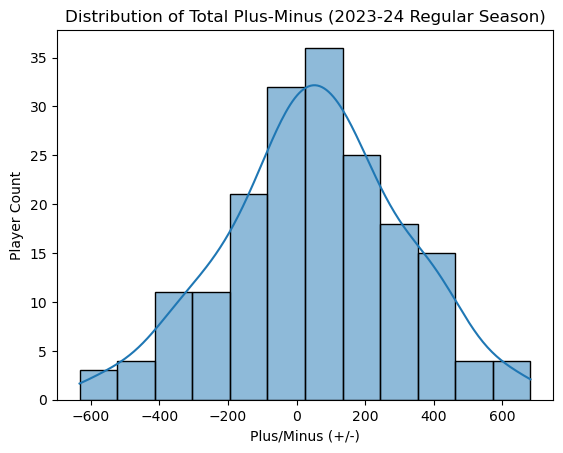

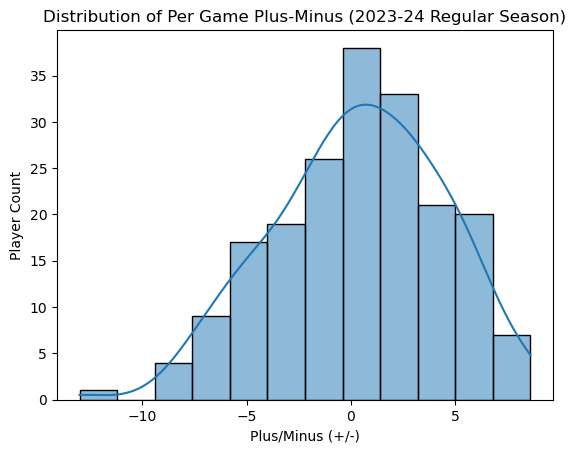

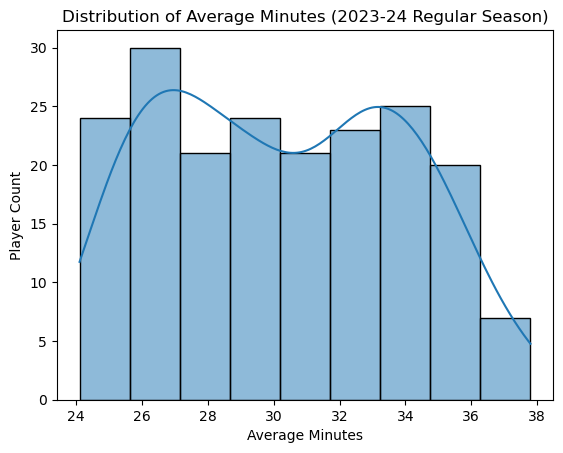

In [4]:
sns.histplot(base_player_stats_total_df['PLUS_MINUS'], kde=True)
plt.title('Distribution of Total Plus-Minus (2023-24 Regular Season)')
plt.xlabel('Plus/Minus (+/-)')
plt.ylabel('Player Count')
plt.show()

sns.histplot(base_player_stats_per_game_df['PLUS_MINUS'], kde=True)
plt.title('Distribution of Per Game Plus-Minus (2023-24 Regular Season)')
plt.xlabel('Plus/Minus (+/-)')
plt.ylabel('Player Count')
plt.show()


sns.histplot(base_player_stats_per_game_df['MIN'], kde=True)
plt.title('Distribution of Average Minutes (2023-24 Regular Season)')
plt.xlabel('Average Minutes')
plt.ylabel('Player Count')
plt.show()

### Top and Bottom Performers

In [5]:
total_top_pfrm = base_player_stats_total_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=False).head(10)
print("Top Total +/- for 2023-24 Regular Season")
print(total_top_pfrm)

print("")
print("")
print("")

total_bot_pfrm = base_player_stats_total_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=True).head(10)
print("Bottom Total +/- for 2023-24 Regular Season")
print(total_bot_pfrm)

Top Total +/- for 2023-24 Regular Season
                  PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS          MIN
434              Nikola Jokić               DEN         682  2736.533333
142             Derrick White               BOS         619  2380.985000
501   Shai Gilgeous-Alexander               OKC         613  2552.686667
268              Jayson Tatum               BOS         608  2645.213333
333  Kentavious Caldwell-Pope               DEN         572  2401.756667
233             Jalen Brunson               NYK         512  2726.303333
490                Sam Hauser               BOS         492  1740.585000
406        Michael Porter Jr.               DEN         472  2564.605000
462               Paul George               LAC         461  2501.766667
464          Payton Pritchard               BOS         449  1825.733333



Bottom Total +/- for 2023-24 Regular Season
        PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS          MIN
410   Miles Bridges               CHA        -

In [6]:
per_game_top_pfrm = base_player_stats_per_game_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=False).head(10)
print("Top Per Game +/- for 2023-24 Regular Season")
print(per_game_top_pfrm)

print("")
print("")
print("")

per_game_bot_pfrm = base_player_stats_per_game_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=True).head(10)
print("Bottom Per Game +/- for 2023-24 Regular Season")
print(per_game_bot_pfrm)

Top Per Game +/- for 2023-24 Regular Season
                  PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS   MIN
434              Nikola Jokić               DEN         8.6  34.6
142             Derrick White               BOS         8.5  32.6
268              Jayson Tatum               BOS         8.2  35.7
501   Shai Gilgeous-Alexander               OKC         8.2  34.0
439                OG Anunoby               NYK         7.8  34.0
333  Kentavious Caldwell-Pope               DEN         7.5  31.6
354        Kristaps Porziņģis               BOS         7.3  29.6
283               Joel Embiid               PHI         6.8  33.6
233             Jalen Brunson               NYK         6.6  35.4
10                 Al Horford               BOS         6.5  26.8



Bottom Per Game +/- for 2023-24 Regular Season
         PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS   MIN
528      Timmy Allen               MEM       -13.0  25.1
410    Miles Bridges               CHA        -9.2  37.4
356      

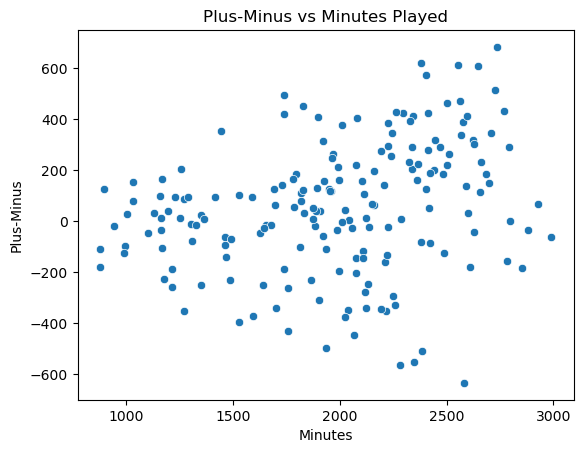

In [7]:
sns.scatterplot(data=base_player_stats_total_df, x='MIN', y='PLUS_MINUS')
plt.title('Plus-Minus vs Minutes Played')
plt.xlabel('Minutes')
plt.ylabel('Plus-Minus')
plt.show()

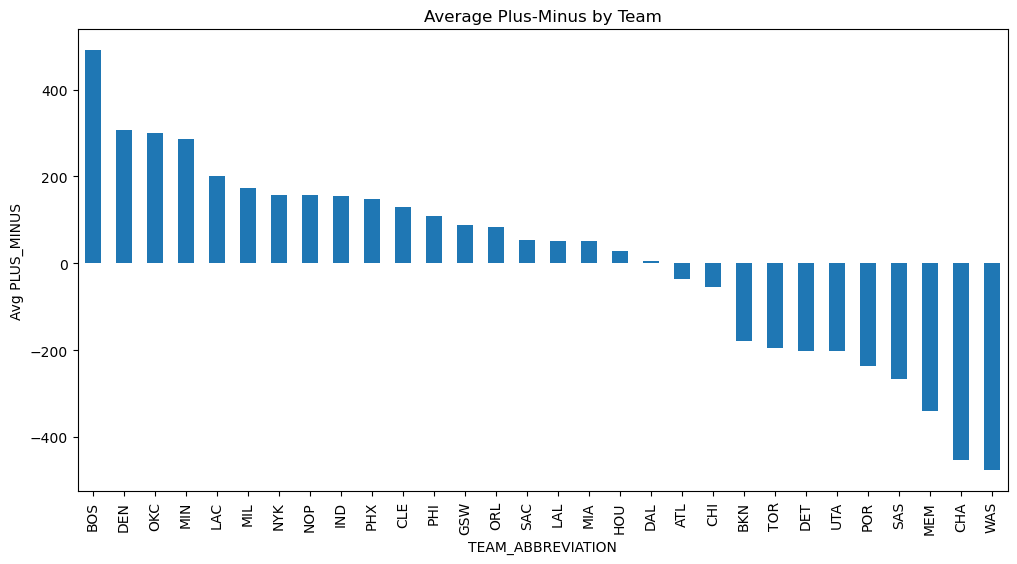

In [8]:
pm_by_team = base_player_stats_total_df.groupby('TEAM_ABBREVIATION')['PLUS_MINUS'].mean().sort_values(ascending=False)

pm_by_team.plot(kind='bar', figsize=(12,6), title='Average Plus-Minus by Team')
plt.ylabel('Avg PLUS_MINUS')
plt.show()

## Regular Season 2023-24: Player Efficiency Rating

### True Shooting Percentage

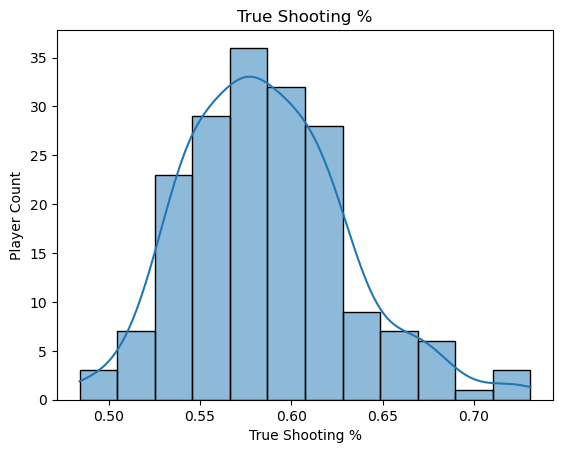

In [9]:
sns.histplot(data=advanced_player_stats_total_df['TS_PCT'], kde=True)
plt.title('True Shooting %')
plt.xlabel('True Shooting %')
plt.ylabel('Player Count')
plt.show()

### By Position

Define a function to attach position to each player in my main DataFrame

In [10]:
def get_player_position(player_id):
    try:
        info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
        df = info.get_data_frames()[0]
        return df.loc[0, 'POSITION']
    except:
        return None

In [11]:
# Add player_id first
player_map = players.get_players()
id_map = {}

for player in player_map:
    full_name = player['full_name']
    player_id = player['id']
    id_map[full_name] = player_id

print(id_map)

{'Alaa Abdelnaby': 76001, 'Zaid Abdul-Aziz': 76002, 'Kareem Abdul-Jabbar': 76003, 'Mahmoud Abdul-Rauf': 51, 'Tariq Abdul-Wahad': 1505, 'Shareef Abdur-Rahim': 949, 'Tom Abernethy': 76005, 'Forest Able': 76006, 'John Abramovic': 76007, 'Alex Abrines': 203518, 'Precious Achiuwa': 1630173, 'Alex Acker': 101165, 'Donald Ackerman': 76008, 'Mark Acres': 76009, 'Charles Acton': 76010, 'Quincy Acy': 203112, 'Alvan Adams': 76011, 'Don Adams': 76012, 'Hassan Adams': 200801, 'Jaylen Adams': 1629121, 'Jordan Adams': 203919, 'Michael Adams': 149, 'Steven Adams': 203500, 'Rafael Addison': 912, 'Bam Adebayo': 1628389, 'Deng Adel': 1629061, 'Rick Adelman': 76015, 'Jeff Adrien': 202399, 'Arron Afflalo': 201167, 'Ochai Agbaji': 1630534, 'Maurice Ager': 200772, 'Mark Aguirre': 76016, 'Blake Ahearn': 201336, 'Danny Ainge': 76017, 'Alexis Ajinca': 201582, 'Henry Akin': 76018, 'Josh Akognon': 203006, 'DeVaughn Akoon-Purcell': 1629152, 'Solomon Alabi': 202374, 'Mark Alarie': 76019, 'Gary Alcorn': 76020, 'Sant

In [ ]:
# Map positions
advanced_player_stats_total_df['PLAYER_ID'] = advanced_player_stats_total_df['PLAYER_NAME'].map(id_map)
advanced_player_stats_total_df['POSITION'] = advanced_player_stats_total_df['PLAYER_ID'].apply(lambda pid: get_player_position(pid) if pid else None)

## Regular Season 2023-24: Win Shares

I will be using data provided by Basketball Reference. The exact methodology for calculating Win Shares is quite complex, and the site references several statistical models and approaches that it builds upon.

Website URL: https://www.basketball-reference.com/about/ws.html

In [4]:
url = "https://www.basketball-reference.com/leagues/NBA_2024_advanced.html"
tables = pd.read_html(url)
df_ws = tables[0]

print(df_ws.head(1))

    Rk         Player   Age Team Pos     G    GS      MP   PER    TS%  ...  \
0  1.0  DeMar DeRozan  34.0  CHI  SF  79.0  79.0  2989.0  19.7  0.584  ...   

   USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  Awards  
0  25.8  7.0  2.2  9.2  0.147   2.1  -0.3  1.8   2.8  CPOY-2  

[1 rows x 29 columns]
